# Jet Thrust Spindown

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.interpolate import UnivariateSpline

plt.rcParams["figure.figsize"]=15,10 #Set plot size
plt.rcParams.update({'font.size': 16}) #set plot size font
plt.rcParams.update({"axes.grid" : True, "grid.color": "lightgrey"}) #Add grid lines to plot

## Fuel Cut

In [2]:
DataPoints_x = [0.0,0.223,0.243,0.345,0.446,0.547,0.669,0.831,1.074,1.459,2.007,2.615,3.466,4.541,5.453,6]
DataPoints_y = [1.0,0.975,0.837,0.736,0.615,0.506,0.387,0.28,0.199,0.132,0.078,0.047,0.027,0.013,0.004,0.00]

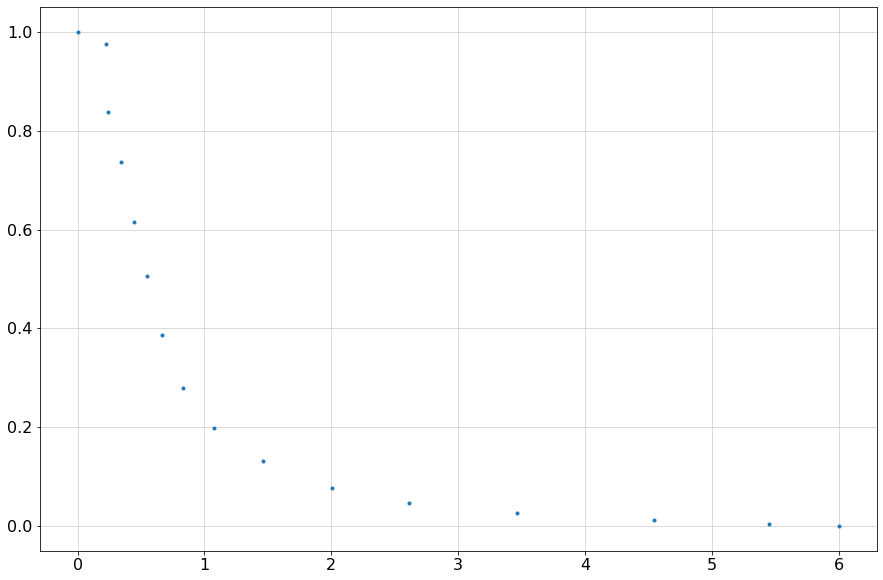

In [3]:
plt.plot(DataPoints_x,DataPoints_y,'.')

1.1195051908214249 1.404420085231313 0.0006502622408186436


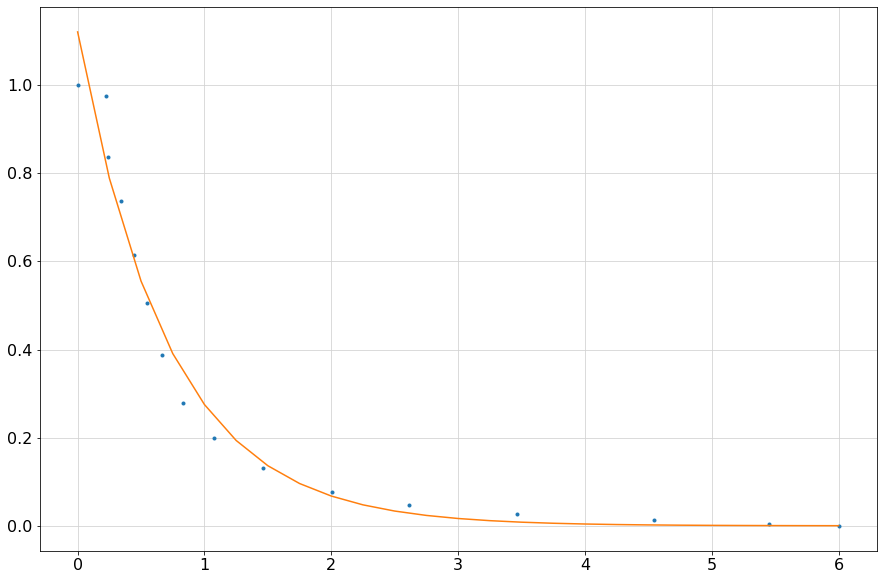

In [4]:
def line(x,a,b,c):
    y = a*np.exp(-b*x) + c
    return y

p, pcov = curve_fit(line,DataPoints_x,DataPoints_y)
a,b,c = p

def fit_eq(x):
    y = a*np.exp(-b*x) + c
    return y

x = np.linspace(0,6,25)

plt.plot(DataPoints_x,DataPoints_y,'.')
plt.plot(x,fit_eq(x))

print(a,b,c)

1.8289953013600455 1.4523128267327676 -3.3579866572439627 0.03681503322688101 0.3063195811384217


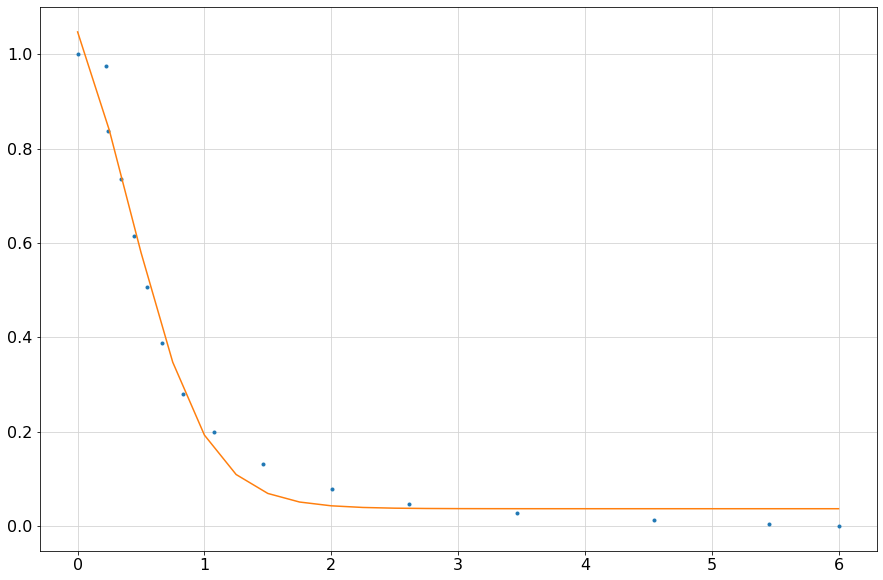

In [5]:
def line(x,a,b,c,d,e):
    y = d+ a/(b+np.exp(-c*(x-e)))
    return y

p, pcov = curve_fit(line,DataPoints_x,DataPoints_y)
a,b,c,d,e = p

def fit_eq(x):
    y = d+ a/(b+np.exp(-c*(x-e)))
    return y

x = np.linspace(0,6,25)

plt.plot(DataPoints_x,DataPoints_y,'.')
plt.plot(x,fit_eq(x))

print(a,b,c,d,e)

#### Testing

https://stackoverflow.com/questions/29382903/how-to-apply-piecewise-linear-fit-in-python

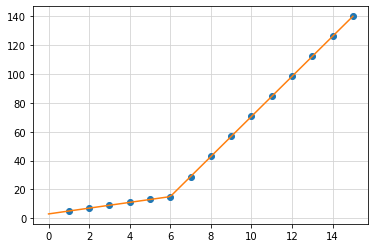

In [6]:
from scipy import optimize
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10 ,11, 12, 13, 14, 15], dtype=float)
y = np.array([5, 7, 9, 11, 13, 15, 28.92, 42.81, 56.7, 70.59, 84.47, 98.36, 112.25, 126.14, 140.03])

def piecewise_linear(x, x0, y0, k1, k2):
    return np.piecewise(x, [x < x0], [lambda x:k1*x + y0-k1*x0, lambda x:k2*x + y0-k2*x0])

p , e = optimize.curve_fit(piecewise_linear, x, y)
xd = np.linspace(0, 15, 100)
plt.plot(x, y, "o")
plt.plot(xd, piecewise_linear(xd, *p))

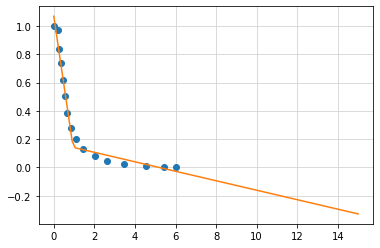

In [7]:
from scipy import optimize
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

x = DataPoints_x
y = DataPoints_y

def piecewise_linear(x, x0, y0, k1, k2):
    return np.piecewise(x, [x < x0], [lambda x:k1*x + y0-k1*x0, lambda x:k2*x + y0-k2*x0])

p , e = optimize.curve_fit(piecewise_linear, x, y)

xd = np.linspace(0, 15, 100)
plt.plot(x, y, "o")
plt.plot(xd, piecewise_linear(xd, *p))

In [8]:
def piecewise_nonlinear(x, x0, y0, a,b,c,d,e,f):
    np.piecewise(x,[x < 0.2, x < 6, x>= 6], [lambda x:a*x**2 + b*x + c, lambda x:d*np.exp(-e*x) + f, lambda x:0])

In [9]:
from scipy import optimize
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

x = DataPoints_x
y = DataPoints_y

def piecewise_nonlinear(x, x0, y0, a,b,c,d,e,f):
    np.piecewise(x,[x < 0.2, x < 6, x>= 6], [lambda x:a*x**2 + b*x + c, lambda x:d*np.exp(-e*x) + f, lambda x:0])

#p , e = optimize.curve_fit(piecewise_nonlinear, x, y)

#xd = np.linspace(0, 15, 100)
#plt.plot(x, y, "o")
#plt.plot(xd, piecewise_linear(xd, *p))

## Throttle Chop

In [10]:
DataPoints_x = [0.00,0.39,0.49,0.59,0.67,0.80,0.94,1.09,1.25,1.44,1.65,1.92,2.29,2.82,3.43,4.05,4.66,5.32,5.93,6.57,7.20,7.84,8.48,9.11,9.76,10.37,11.04,11.67,12]
DataPoints_y = [1.00,1.00,0.93,0.86,0.79,0.72,0.65,0.58,0.51,0.45,0.38,0.32,0.26,0.22,0.20,0.18,0.16,0.15,0.14,0.13,0.12,0.11,0.11,0.10,0.09,0.09,0.09,0.08,0.08]

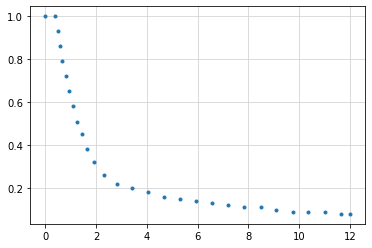

In [11]:
plt.plot(DataPoints_x,DataPoints_y,'.')

1.2621048774638637 0.9060704619074829 0.11128621313264658


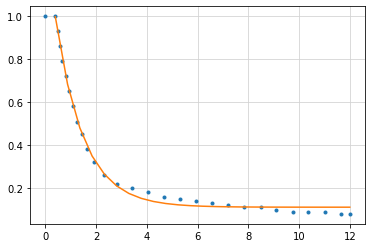

In [12]:
def line(x,a,b,c):
    y = a*np.exp(-b*x) + c
    return y

p, pcov = curve_fit(line,DataPoints_x[1:],DataPoints_y[1:])
a,b,c = p

def fit_eq(x):
    y = a*np.exp(-b*x) + c
    return y

x = np.linspace(min(DataPoints_x[1:]),12,25)

plt.plot(DataPoints_x,DataPoints_y,'.')
plt.plot(x,fit_eq(x))

print(a,b,c)

1.3852794493315619 -1.3565462469035257 -0.5844429912577197 0.09982442886049972 -1.4081913460167639


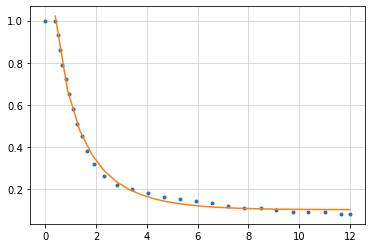

In [13]:
def line(x,a,b,c,d,e):
    y = d+ a/(b+np.exp(-c*(x-e)))
    return y

p, pcov = curve_fit(line,DataPoints_x[1:],DataPoints_y[1:])
a,b,c,d,e = p

def fit_eq(x):
    y = d+ a/(b+np.exp(-c*(x-e)))
    return y

x = np.linspace(min(DataPoints_x[1:]),12,25)

plt.plot(DataPoints_x,DataPoints_y,'.')
plt.plot(x,fit_eq(x))

print(a,b,c,d,e)

In [14]:
print(fit_eq(10))

0.10158906803833052


In [15]:
print(fit_eq(12))

0.10037207268977084


0.8200976692883729 0.3983219056615376 0.004751398345660513


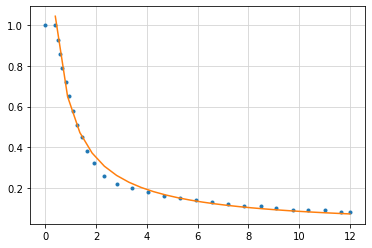

In [22]:
def line(x,a,b,c):
    y = c+ a/(x+b)
    return y

p, pcov = curve_fit(line,DataPoints_x[1:],DataPoints_y[1:])
a,b,c = p

def fit_eq(x):
    y =  c+ a/(x+b)
    return y

x = np.linspace(min(DataPoints_x[1:]),12,25)

plt.plot(DataPoints_x,DataPoints_y,'.')
plt.plot(x,fit_eq(x))

print(a,b,c)

In [23]:
print(fit_eq(10))

0.08361966927713238


In [24]:
print(fit_eq(12))

0.07089725869099367
